## Predicting House Prices In Bengaluru

What are the things that a potential home buyer considers before purchasing a house? The location, the size of the property, vicinity to offices, schools, parks, restaurants, hospitals or the stereotypical white picket fence? What about the most important factor -- the price? 
Now with the lingering impact of demonetization, the enforcement of the Real Estate (Regulation and Development) Act (RERA), and the lack of trust in property developers in the city, housing units sold across India in 2017 dropped by 7 percent. In fact, the property prices in Bengaluru fell by almost 5 percent in the second half of 2017, said a study published by property consultancy Knight Frank. For example, for a potential homeowner, over 9,000 apartment projects and flats for sale are available in the range of ₹42-52 lakh, followed by over 7,100 apartments that are in the ₹52-62 lakh budget segment, says a report by property website Makaan. According to the study, there are over 5,000 projects in the ₹15-25 lakh budget segment followed by those in the ₹34-43 lakh budget category. Buying a home, especially in a city like Bengaluru, is a tricky choice. While the major factors are usually the same for all metros, there are others to be considered for the Silicon Valley of India. With its help millennial crowd, vibrant culture, great climate and a slew of job opportunities, it is difficult to ascertain the price of a house in Bengaluru.   
So what determines the property prices in Namma Bengaluru? 

`Data` : The train and test data will consist of various features that describe that property in Bengaluru. This is an actual data set that is curated over months of primary & secondary research by our team. Each row contains fixed size object of features. There are 9 features and each feature can be accessed by its name. 

`Features` :  
- Area_type - describes the area 
- Availability - when it can be possessed or when it is ready(categorical and time-series) 
- Location - where it is located in Bengaluru 
- Price - Value of the property in lakhs(INR) 
- Size - in BHK or Bedroom (1-10 or more) 
- Society - to which society it belongs 
- Total_sqft - size of the property in sq.ft 
- Bath - No. of bathrooms 
- Balcony - No. of the balcony 

`Problem Statement`: With the given 9 features(categorical and continuous) build a model to predict the price of houses in Bengaluru.

In [1]:
# Import libraries
import os
import re
import math
import pandas as pd
import numpy as np
import matplotlib 
from matplotlib import pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
pd.set_option("display.max_columns",None)
sns.set_style('whitegrid')
%matplotlib inline


### Loading data

In [2]:
# Reading data
train = pd.read_csv(os.path.join('data', 'Train.csv'))
test = pd.read_csv(os.path.join('data', 'Test.csv'))

len_train = len(train)
len_test = len(test)

print("# Train: %d"%(len_train))
print("# Test: %d"%(len_test))

# Train: 13320
# Test: 1480


In [3]:
train.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
test.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Ready To Move,Brookefield,2 BHK,Roeekbl,1225,2.0,2.0,NaN
1,Plot Area,Ready To Move,Akshaya Nagar,9 Bedroom,NaN,2400,9.0,2.0,NaN
2,Plot Area,18-Apr,Hennur Road,4 Bedroom,Saandtt,1650,5.0,2.0,NaN
3,Super built-up Area,Ready To Move,Kodichikkanahalli,3 BHK,Winerri,1322,3.0,1.0,NaN
4,Super built-up Area,Ready To Move,Konanakunte,2 BHK,AmageSa,1161,2.0,1.0,NaN


##### Missing values

In [5]:
train.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [6]:
test.isna().sum()

area_type          0
availability       0
location           0
size               2
society          626
total_sqft         0
bath               7
balcony           69
price           1480
dtype: int64

##### Merging datasets for data cleanup

In [7]:
data = pd.concat([train, test])

##### total_sqft

The values in the column are not homogenous in nature. Need to fix it

In [8]:
data['total_sqft'] = data['total_sqft'].apply(lambda x: x.split(' - ')[1] if (len(x.split(' - ')))>1 else x.split(' - ')[0]) 
data['total_sqft'] = data['total_sqft'].apply(lambda x: re.findall(r'\d+',x)[0])
data['total_sqft'] = data['total_sqft'].astype(np.float64)

In [9]:
numerical_features = ['total_sqft', 'bath', 'balcony']
discrete_features = ['bath', 'balcony']
continous_features = ['total_sqft']
categorical_features = ['area_type', 'availability', 'location', 'size', 'society']

##### Filling missing values

In [10]:
for col in ['location', 'size', 'society', 'bath', 'balcony']:
    data[col] = data[col].fillna(value = data[col].value_counts().idxmax())

In [11]:
data.isna().sum()

area_type          0
availability       0
location           0
size               0
society            0
total_sqft         0
bath               0
balcony            0
price           1480
dtype: int64

##### LabelEncoder for categorical variables

In [12]:
from sklearn.preprocessing import LabelEncoder
for feature in ['area_type', 'availability', 'location', 'size', 'society']:
    data[feature] = LabelEncoder().fit_transform(data[feature])

##### StandardScaling on Continuous variables

In [13]:
from sklearn.preprocessing import StandardScaler
for feature in ['total_sqft']: #, 'bath', 'balcony']: include these two?
    data[feature] = StandardScaler().fit_transform(data[feature].values.reshape(-1, 1))

### Visualizing data for more insights

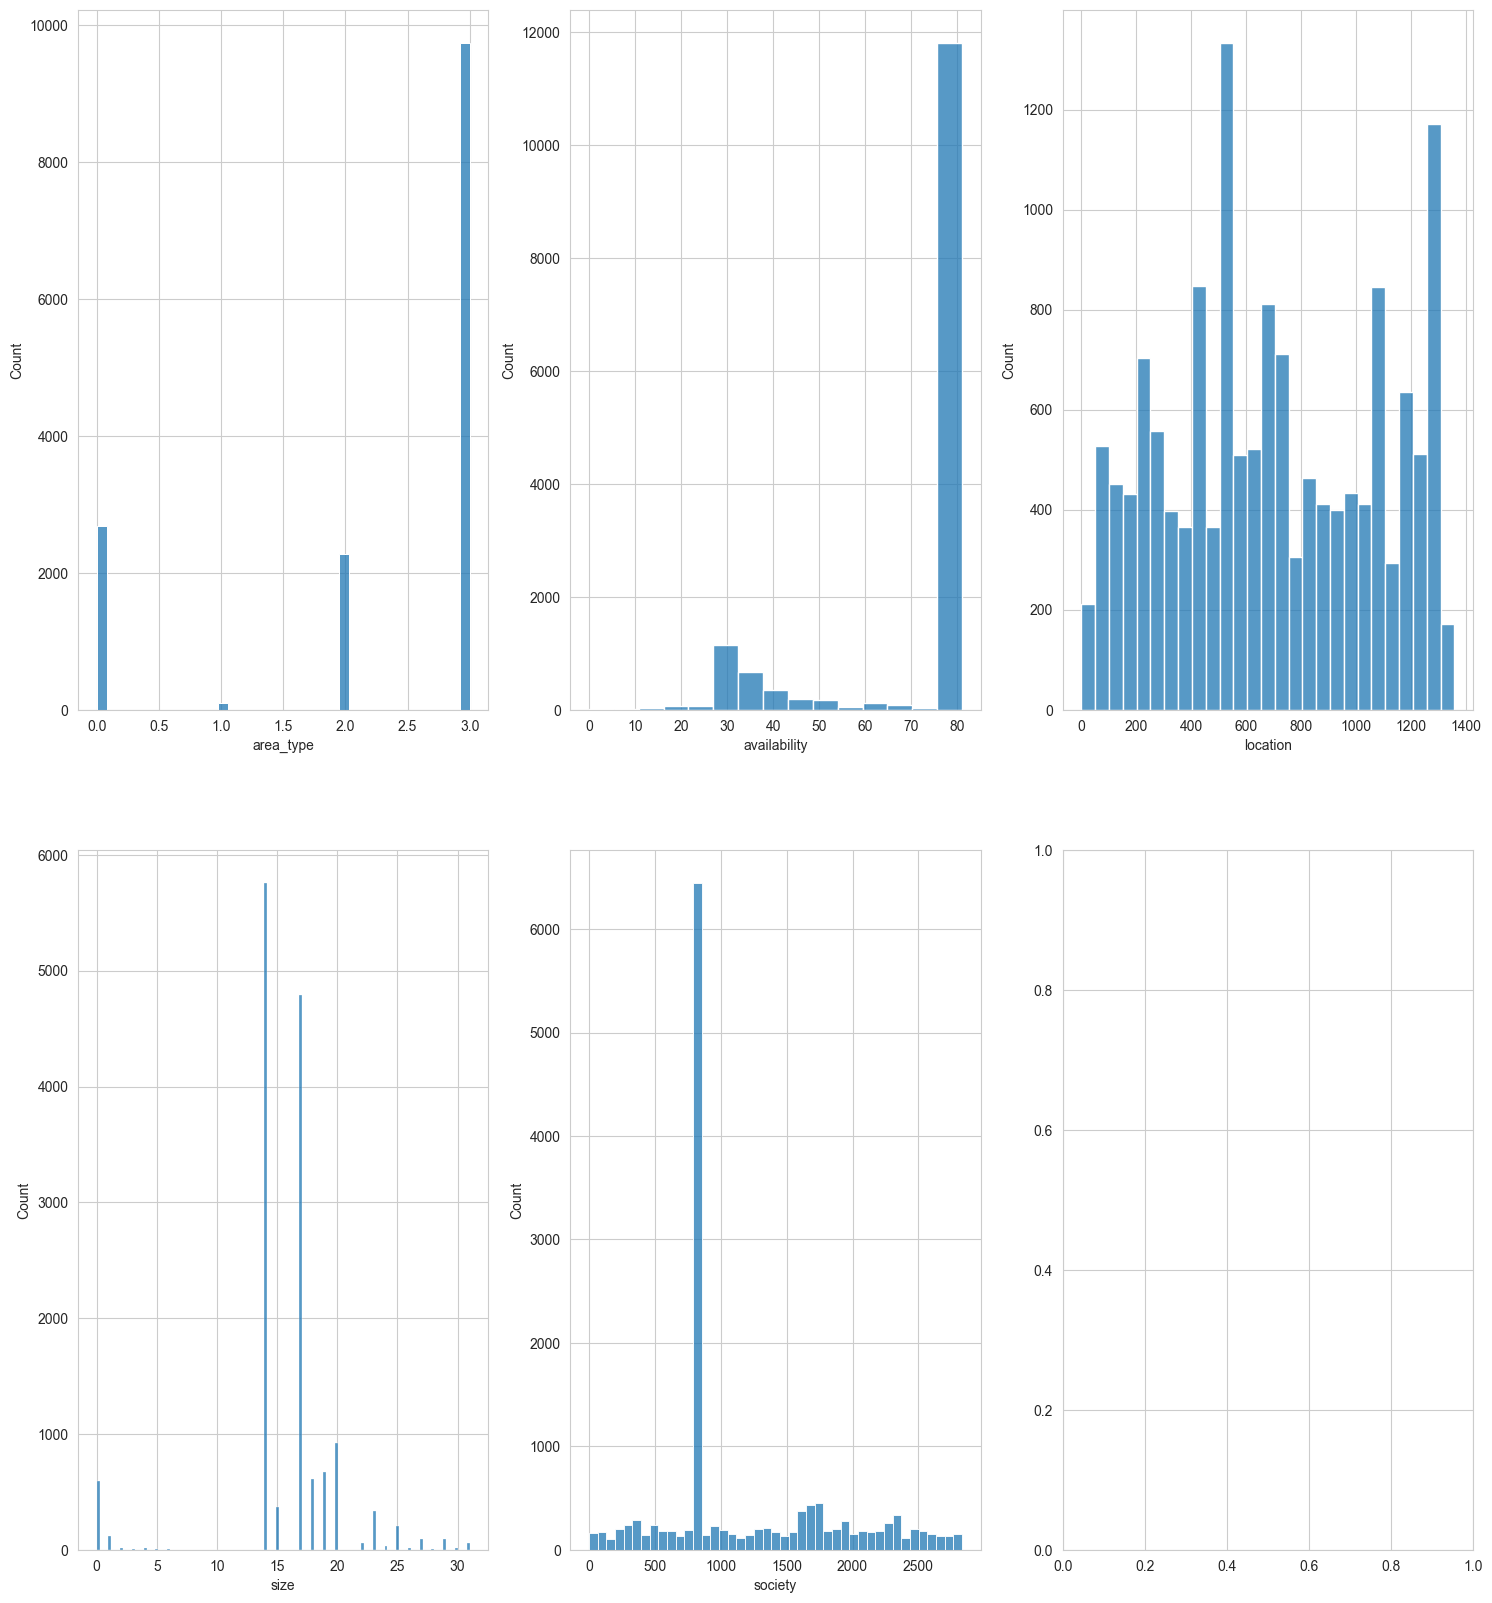

In [14]:
fig, axis=plt.subplots(2, 3, figsize = (18, 20))
axes=[ax for axis_row in axis for ax in axis_row]
for i, c in enumerate(['area_type', 'availability', 'location', 'size', 'society']):
    # print(c)
    sns.histplot(data = data, x = c, ax = axes[i])
    #data[c].value_counts().plot(kind = "hist", autopct = "%.0f", title = c,ax = axes[i])

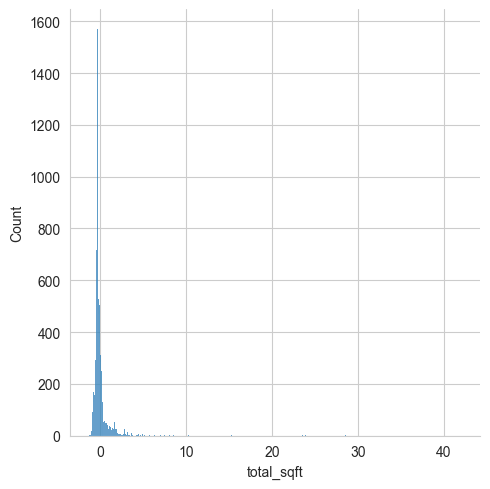

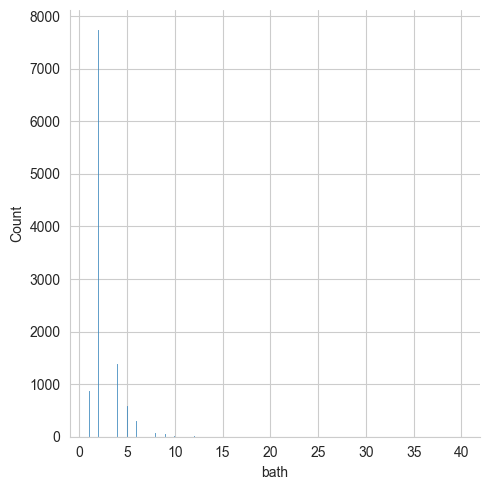

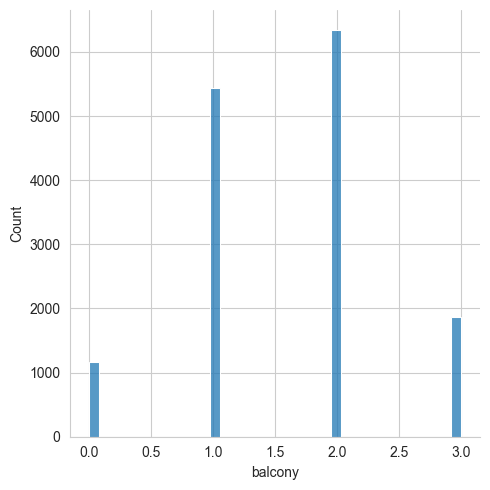

In [15]:
# fig, axis=plt.subplots(1, 3, figsize = (18, 20))
# axes=[ax for axis_row in axis for ax in axis_row]
for i, c in enumerate(['total_sqft', 'bath', 'balcony']):
    # print(c)
    sns.displot(data = data, x = c)
    #data[c].value_counts().plot(kind = "hist", autopct = "%.0f", title = c,ax = axes[i])

##### Splitting data

In [16]:
train, test = data[:len_train], data[len_train:]

In [17]:
y_train = train.pop('price')
X_train = train
test.drop(columns = ['price'], inplace = True)
X_test = test

##### Fetching usefulness of each variable

In [18]:
from sklearn.feature_selection import mutual_info_regression
info=mutual_info_regression(X_train,y_train)
info = {train.columns[i]:info[i] for i in range(len(info))}

In [19]:
info = {i:info[i] for i in sorted(info, reverse = True, key = lambda x: info.get(x))}


In [20]:
X_train = X_train[list(info.keys())[:6]]
X_test = X_test[list(info.keys())[:6]]

### Train model

In [21]:
import xgboost as xgb
xgr=xgb.XGBRegressor()
xgr.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [22]:
min_child_weight=[1, 2, 3, 4, 5, 6]
max_depth=[int(x) for x in np.linspace(start=5,stop=30,num=6)]
gamma=[i/10.0 for i in range(0,5)]
subsample=[i/10.0 for i in range(6,10)]
colsample_bytree=[i/10.0 for i in range(6,10)]
reg_alpha=[1e-5, 1e-2, 0.1, 1, 100,0, 0.001, 0.005,0.05]
learning_rate=[0.05, 0.025, 0.075, 0.25, 0.5, 0.75, 1]
grid={'min_child_weight':min_child_weight,'max_depth':max_depth,'gamma':gamma,'subsample':subsample,'colsample_bytree':colsample_bytree,'reg_alpha':reg_alpha,'learning_rate':learning_rate}
print(grid)

{'min_child_weight': [1, 2, 3, 4, 5, 6], 'max_depth': [5, 10, 15, 20, 25, 30], 'gamma': [0.0, 0.1, 0.2, 0.3, 0.4], 'subsample': [0.6, 0.7, 0.8, 0.9], 'colsample_bytree': [0.6, 0.7, 0.8, 0.9], 'reg_alpha': [1e-05, 0.01, 0.1, 1, 100, 0, 0.001, 0.005, 0.05], 'learning_rate': [0.05, 0.025, 0.075, 0.25, 0.5, 0.75, 1]}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
xgr_random = RandomizedSearchCV(estimator = xgr, 
                                param_distributions=grid, 
                                scoring='neg_mean_squared_error', 
                                n_iter=10, 
                                cv = 5, 
                                random_state=42, 
                                verbose=2, 
                                n_jobs = 1)
xgr_random.fit(X_train,y_train)

In [28]:
xgr_random.best_score_

-8728.680818729226

##### Metrics

In [29]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
preds=xgr_random.predict(X_train)
print(mean_absolute_error(preds,y_train))
print(math.sqrt(mean_squared_error(y_train,preds)))
print(- np.sqrt(np.square(np.log10(preds +1) - np.log10(y_train +1)).mean()))

10.884490037882292
22.3239514780436
-0.06325849346146055


In [30]:
op = pd.DataFrame()
op['price']=xgr_random.predict(X_test)

In [31]:
op.to_csv('submissions.csv')